Imports

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import helpers.evaluate
from helpers.model_list import model_map
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
from sklearn.exceptions import FitFailedWarning
from imblearn.over_sampling import SMOTE
#Import models
models = {name: model_class() for name, model_class in model_map.items()}

Load in Data

In [3]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,6.0
1,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
2,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,8.0
3,0.0,1.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,30.0,1.0,1.0,11.0,6.0,7.0
4,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0


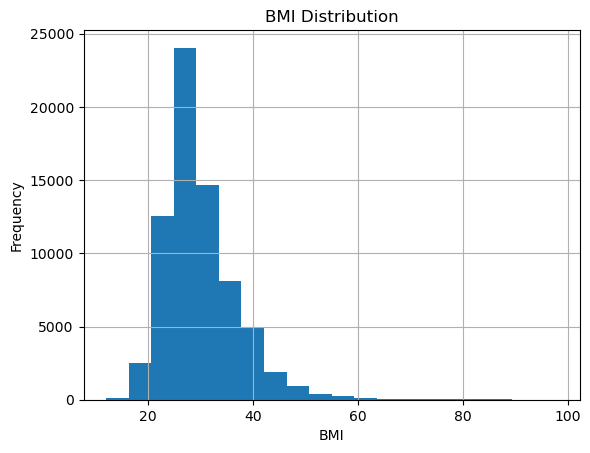

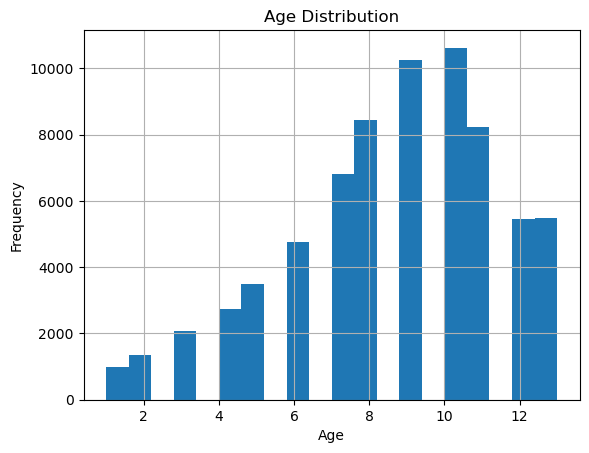

In [4]:
# Univariate Analysis
plt.figure()
df['BMI'].hist(bins=20)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# 13-level age category 1 = 18-24 9 = 60-64 13 = 80 or older
plt.figure()
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


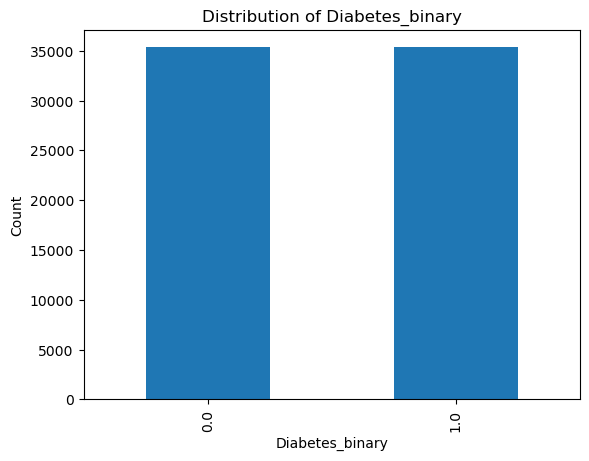

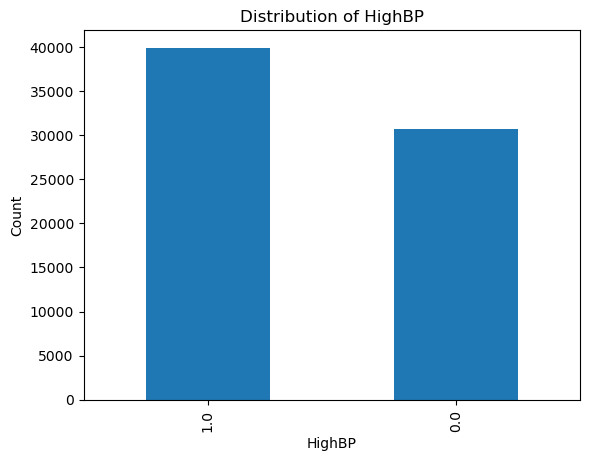

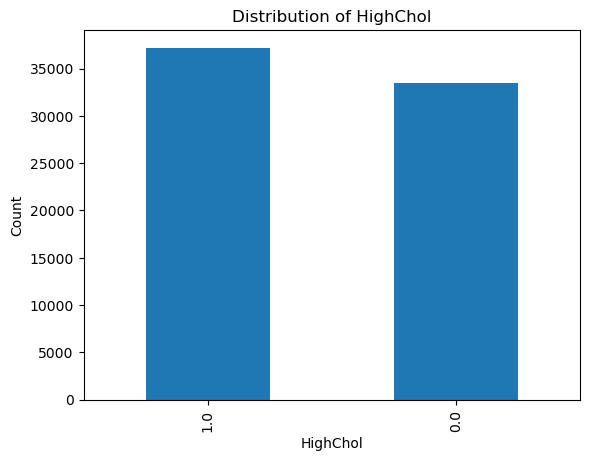

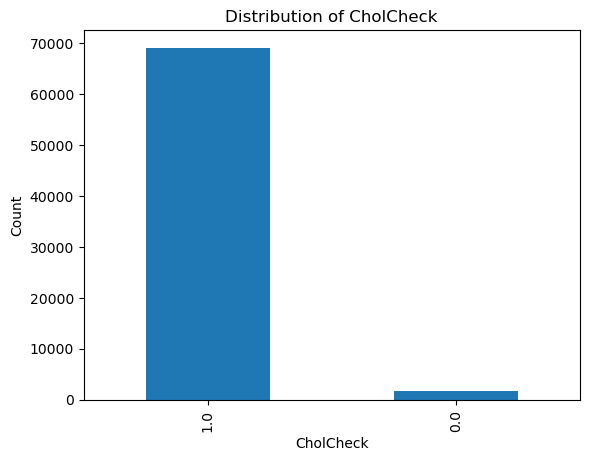

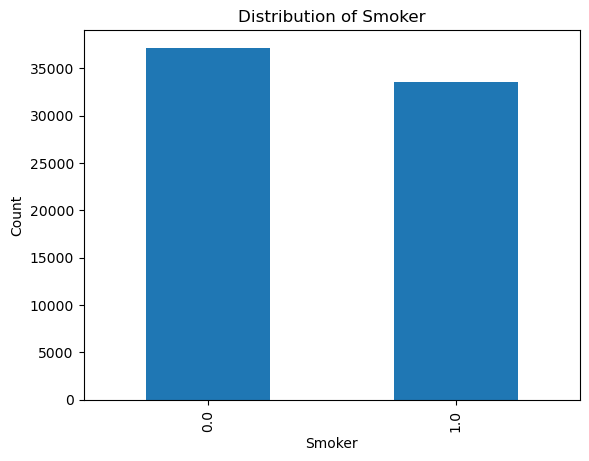

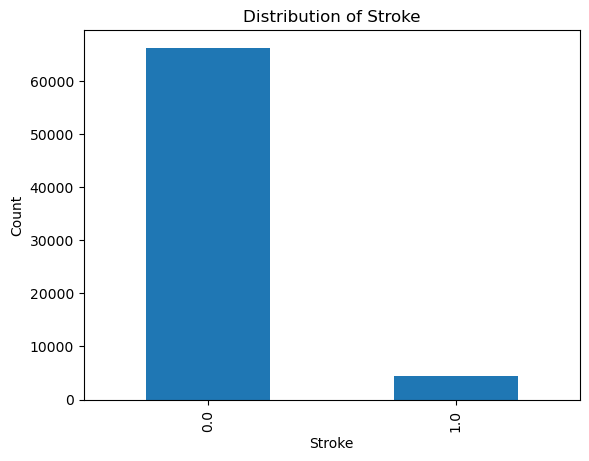

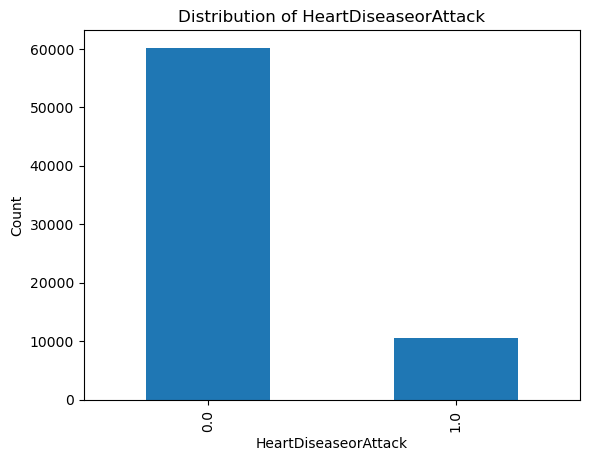

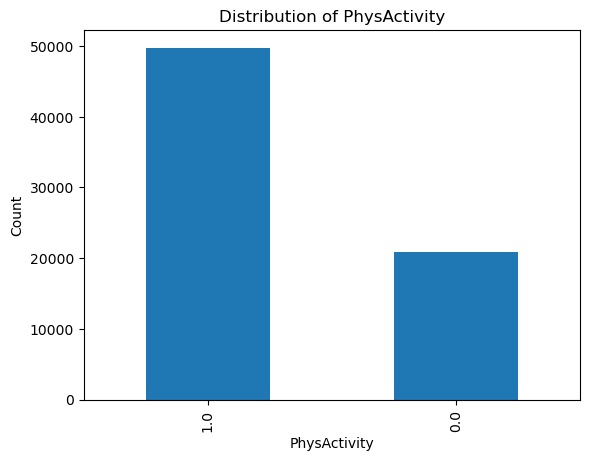

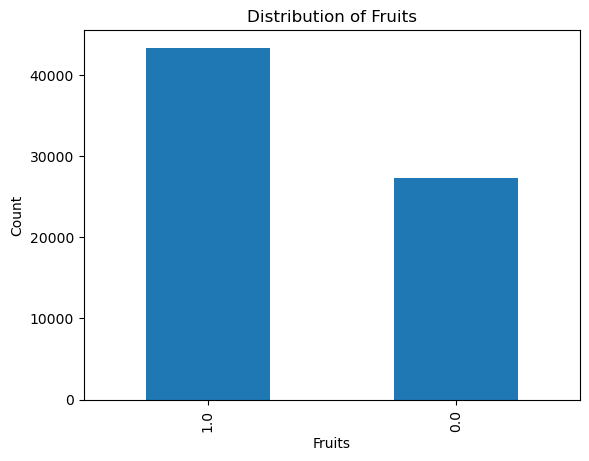

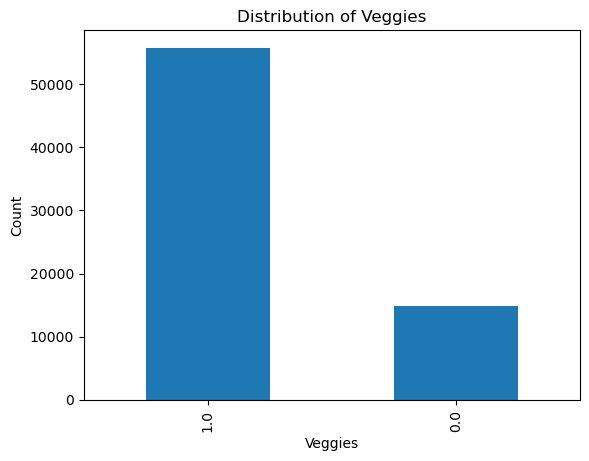

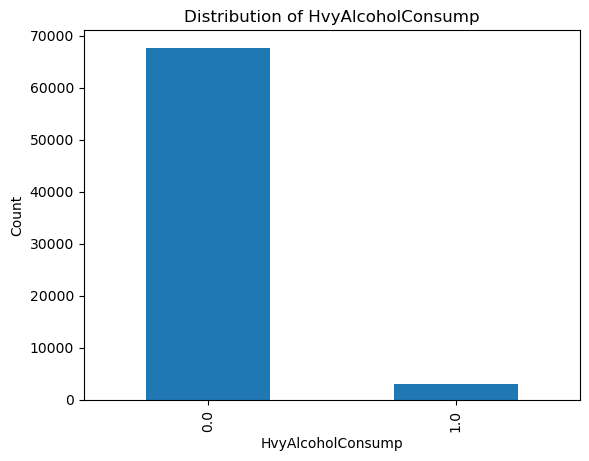

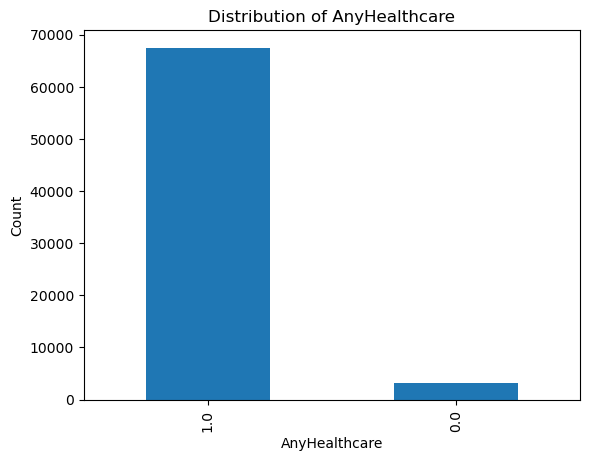

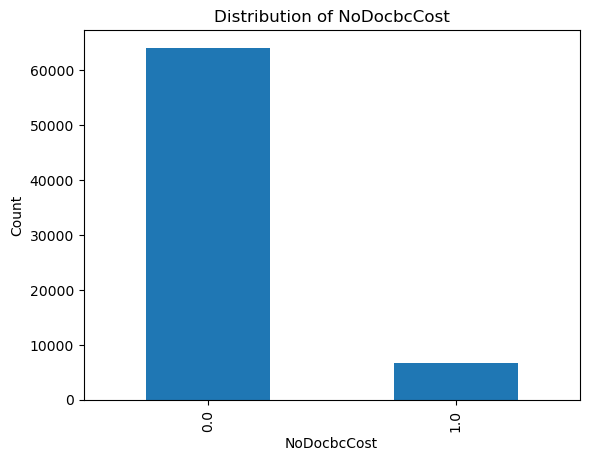

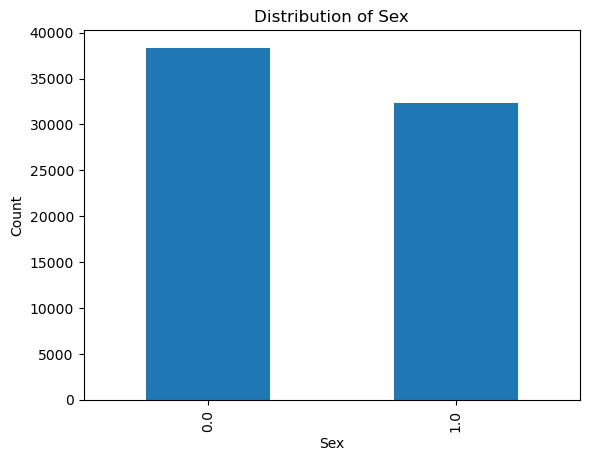

In [5]:
# Identify categorical/binary features to visualize their distributions.

categorical_features = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
    'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'Sex'
]

for col in categorical_features:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

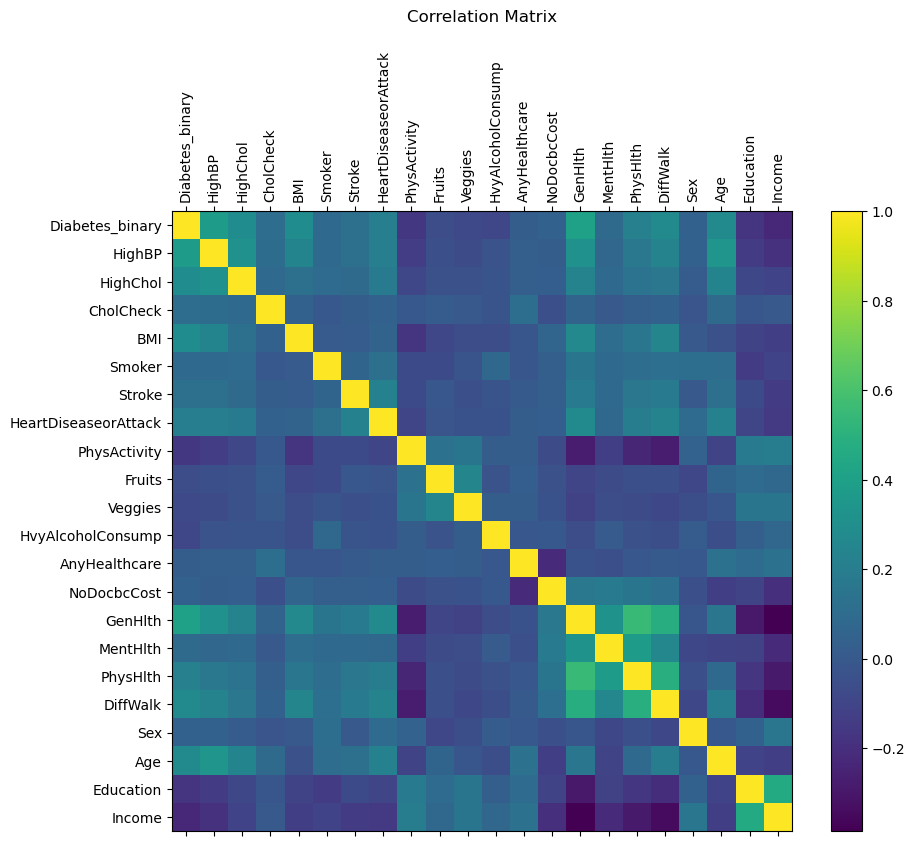

In [6]:
# Mulitvariate analysis

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.title("Correlation Matrix", pad=20)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.show()

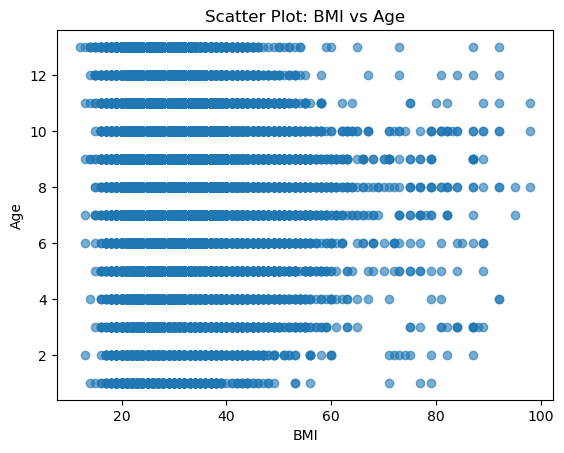

In [7]:
# 2. Scatter Plot: BMI vs Age 
plt.figure()
plt.scatter(df['BMI'], df['Age'], alpha=0.6)
plt.title("Scatter Plot: BMI vs Age")
plt.xlabel("BMI")
plt.ylabel("Age")
plt.show()

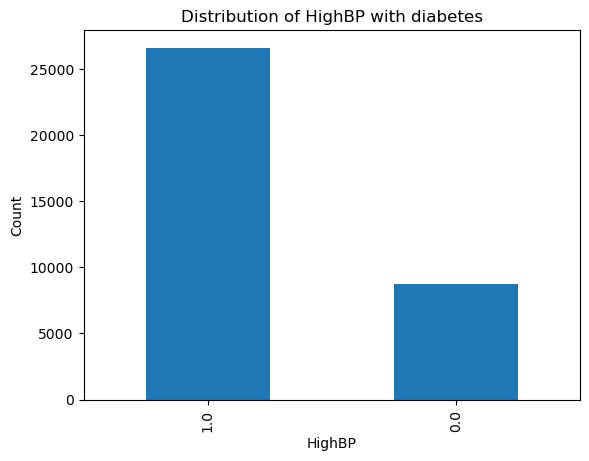

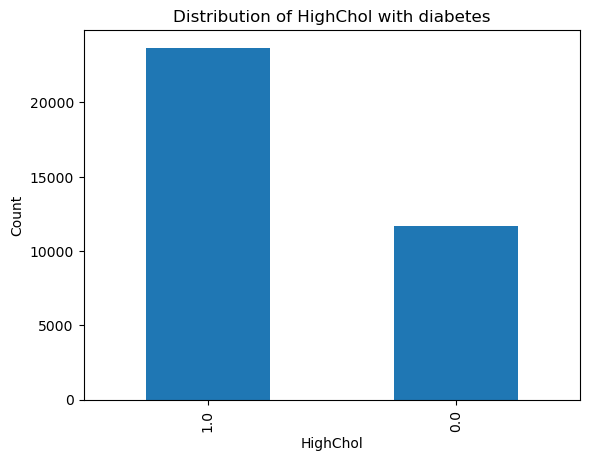

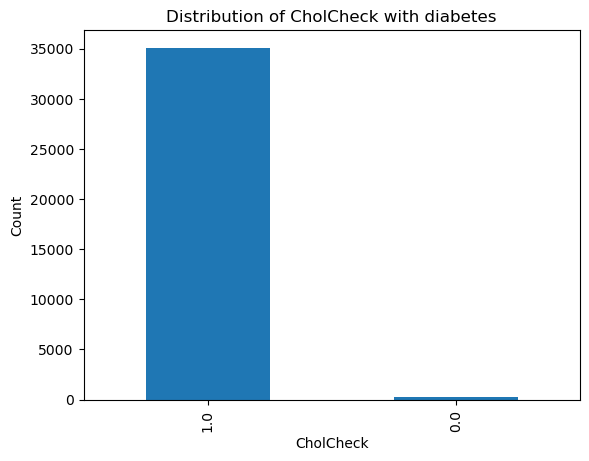

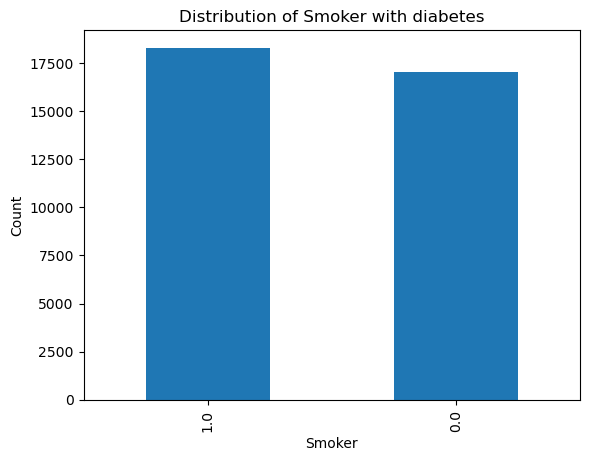

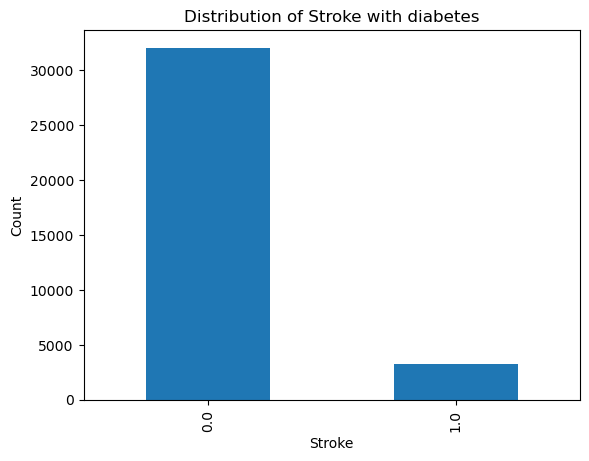

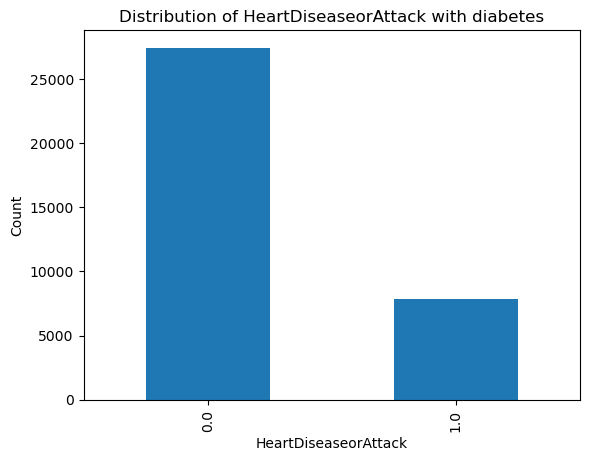

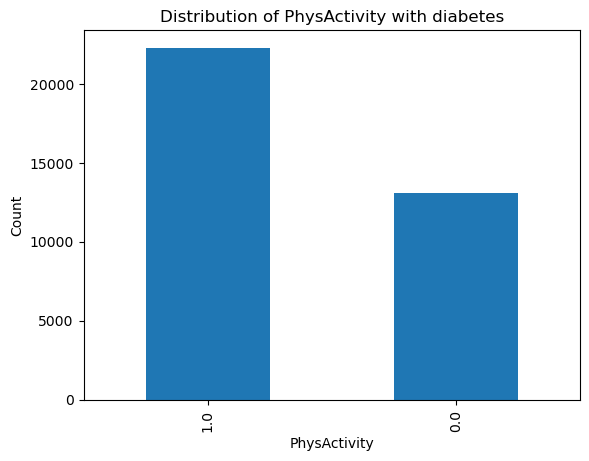

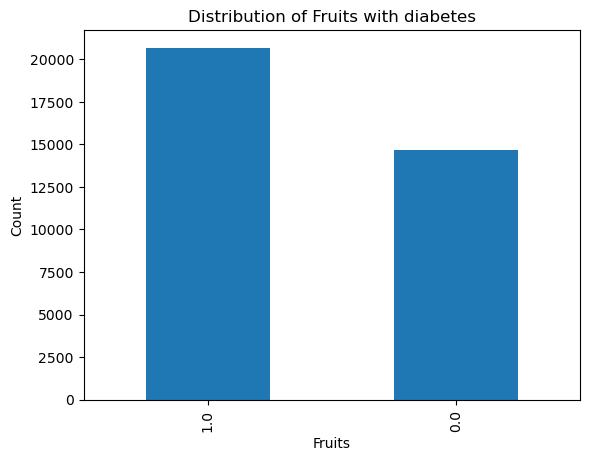

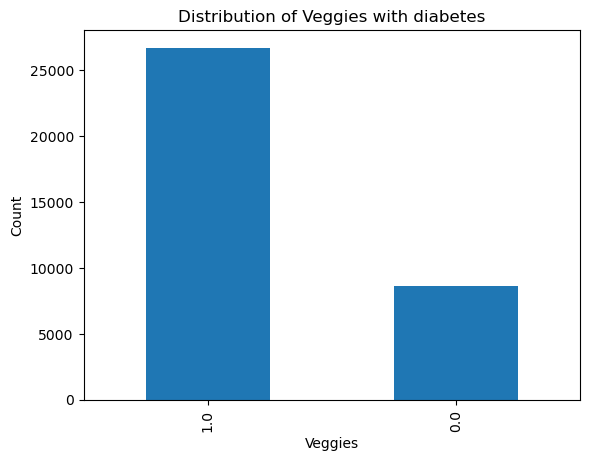

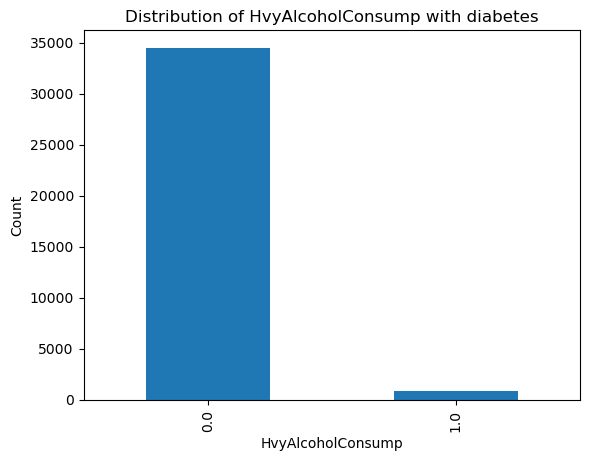

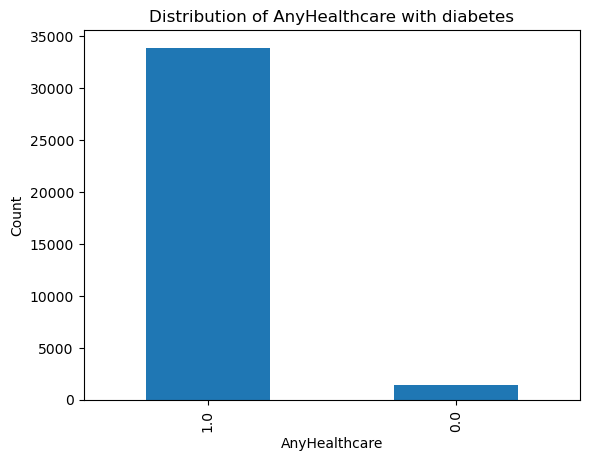

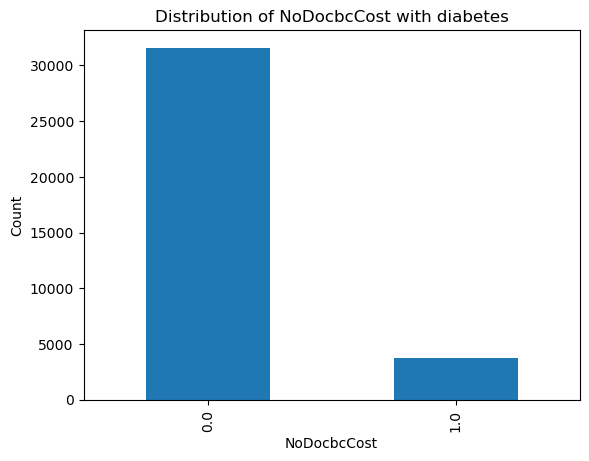

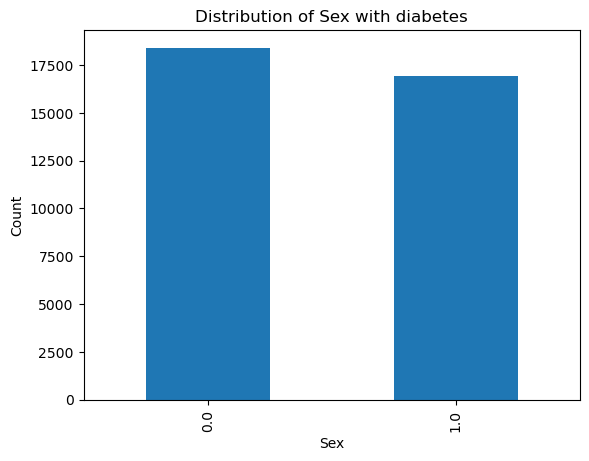

In [8]:
diabetes_df=df[(df['Diabetes_binary']==1)]

for col in categorical_features:
    if(col!='Diabetes_binary'):
        plt.figure()
        diabetes_df[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col} with diabetes")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

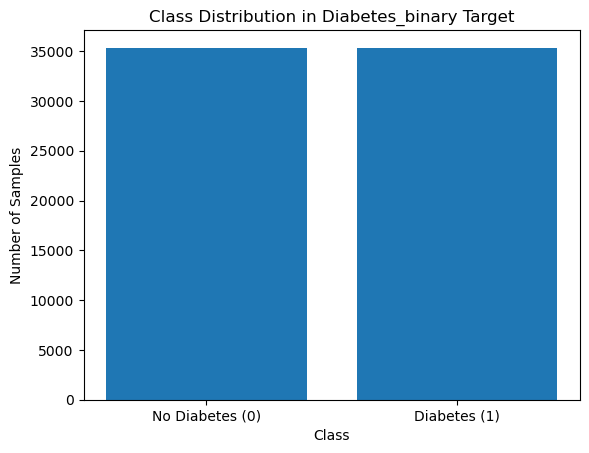

In [9]:
#Visualize Class Imbalance
counts = df['Diabetes_binary'].value_counts().sort_index()
labels = ['No Diabetes (0)', 'Diabetes (1)']


plt.figure()
plt.bar(labels, counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Diabetes_binary Target')
plt.show()

Explore Data

In [10]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)


Dataset shape: (70692, 22)

Data types:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [11]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.565255      0.526467      0.977140   
std           0.500004      0.495727      0.499303      0.149457   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.870537      0.474155      0.062313              0.148645   
std        7.150194      0.499335      0.241724              0.355741   
min       12.000000      0.000000      0.000000              0.000000   
2

In [12]:
# Count missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [13]:
# Check for duplicate records
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1646


Clean Data

In [14]:
print("Dataset shape:", df.shape)
df = df.drop_duplicates()
print("New shape:", df.shape)


Dataset shape: (70692, 22)
New shape: (69046, 22)


Split Data

In [15]:
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

#Transform target

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X.columns)

In [16]:
RAW_MODELS = {
    "Decision Tree",
    "Random Forest",
    "Bagging",
    "AdaBoost",
    "Gradient Boosting",
    "Cat Boost",
    "Stacking",
}

Train Models


--- Training and Evaluating Decision Tree ---
Decision Tree Performance:
Accuracy:  0.6406
Precision: 0.6408
Recall:    0.6406
F1 Score:  0.6407
Confusion Matrix:
[[4290 2433]
 [2530 4557]]


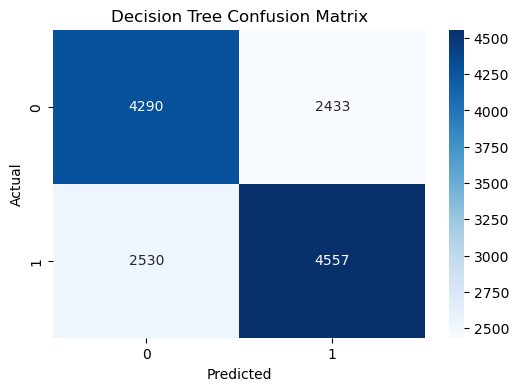


--- Training and Evaluating Logistic Regression ---
Logistic Regression Performance:
Accuracy:  0.7386
Precision: 0.7386
Recall:    0.7386
F1 Score:  0.7384
Confusion Matrix:
[[4821 1902]
 [1708 5379]]


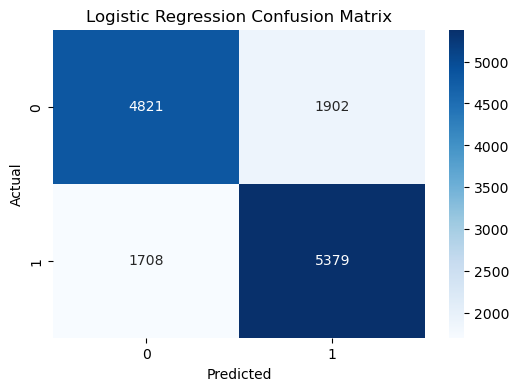


--- Training and Evaluating K Nearest Neighbors ---
K Nearest Neighbors Performance:
Accuracy:  0.6988
Precision: 0.6987
Recall:    0.6988
F1 Score:  0.6986
Confusion Matrix:
[[4533 2190]
 [1970 5117]]


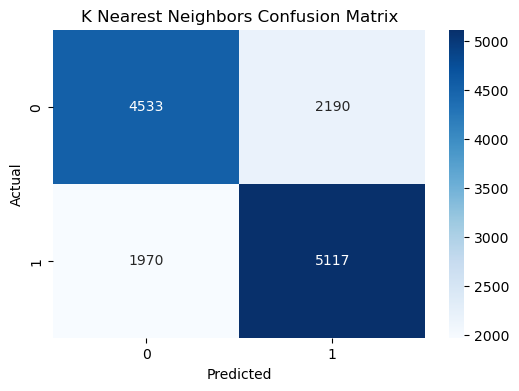


--- Training and Evaluating Neural Network ---
Neural Network Performance:
Accuracy:  0.7463
Precision: 0.7474
Recall:    0.7463
F1 Score:  0.7456
Confusion Matrix:
[[4690 2033]
 [1471 5616]]


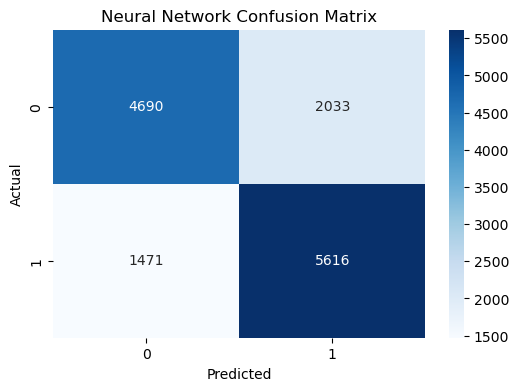


--- Training and Evaluating Cat Boost ---
Cat Boost Performance:
Accuracy:  0.7455
Precision: 0.7464
Recall:    0.7455
F1 Score:  0.7450
Confusion Matrix:
[[4713 2010]
 [1504 5583]]


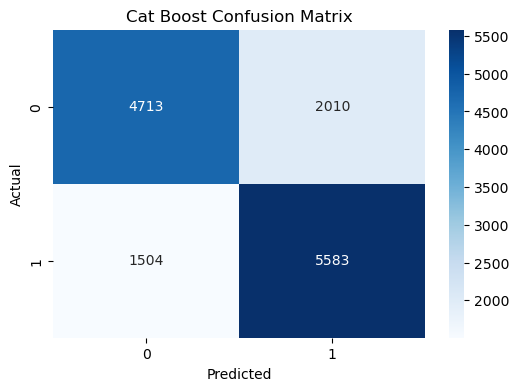


--- Training and Evaluating AdaBoost ---
AdaBoost Performance:
Accuracy:  0.7434
Precision: 0.7434
Recall:    0.7434
F1 Score:  0.7432
Confusion Matrix:
[[4834 1889]
 [1655 5432]]


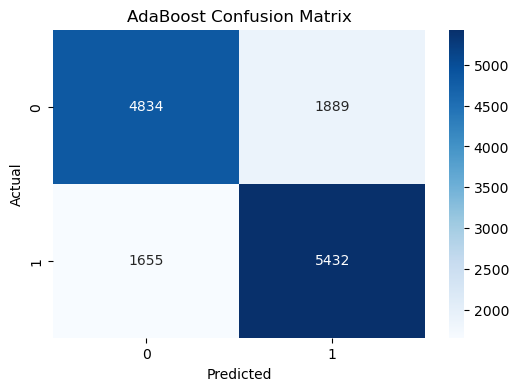


--- Training and Evaluating Bagging ---
Bagging Performance:
Accuracy:  0.6891
Precision: 0.6904
Recall:    0.6891
F1 Score:  0.6890
Confusion Matrix:
[[4804 1919]
 [2375 4712]]


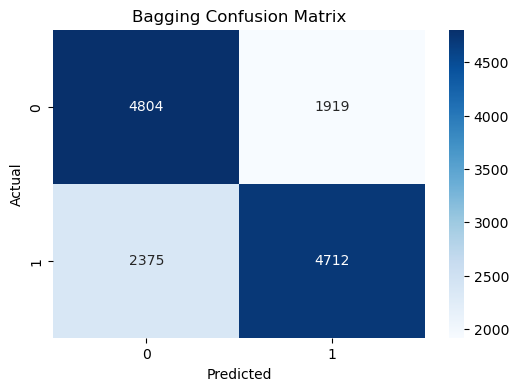


--- Training and Evaluating Gradient Boosting ---
Gradient Boosting Performance:
Accuracy:  0.7457
Precision: 0.7463
Recall:    0.7457
F1 Score:  0.7452
Confusion Matrix:
[[4745 1978]
 [1534 5553]]


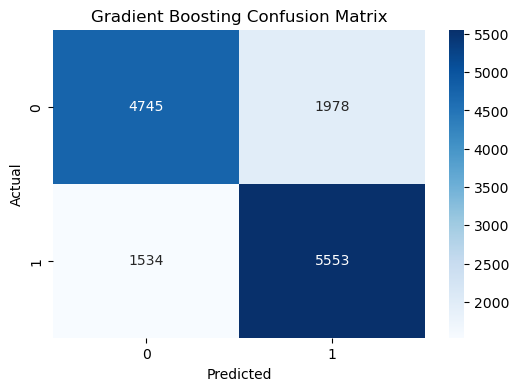


--- Training and Evaluating Random Forest ---
Random Forest Performance:
Accuracy:  0.7243
Precision: 0.7245
Recall:    0.7243
F1 Score:  0.7238
Confusion Matrix:
[[4628 2095]
 [1713 5374]]


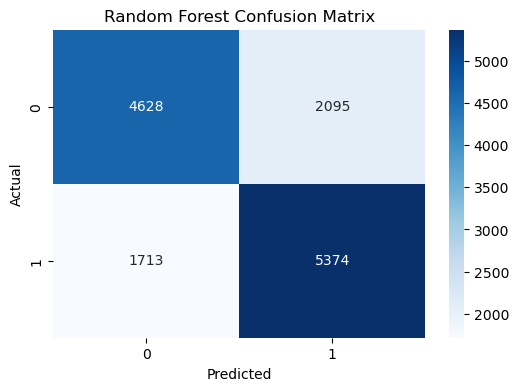


--- Training and Evaluating Stacking ---
Stacking Performance:
Accuracy:  0.6962
Precision: 0.6962
Recall:    0.6962
F1 Score:  0.6961
Confusion Matrix:
[[4565 2158]
 [2037 5050]]


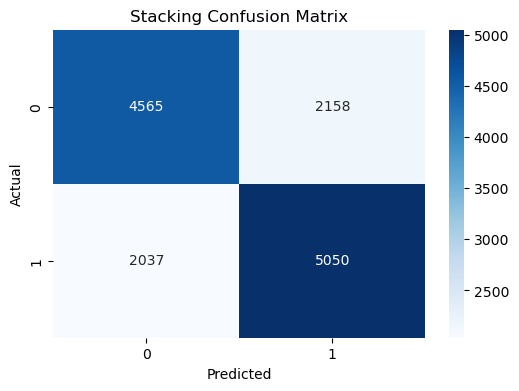


--- Training and Evaluating SVC ---
SVC Performance:
Accuracy:  0.7425
Precision: 0.7441
Recall:    0.7425
F1 Score:  0.7416
Confusion Matrix:
[[4613 2110]
 [1446 5641]]


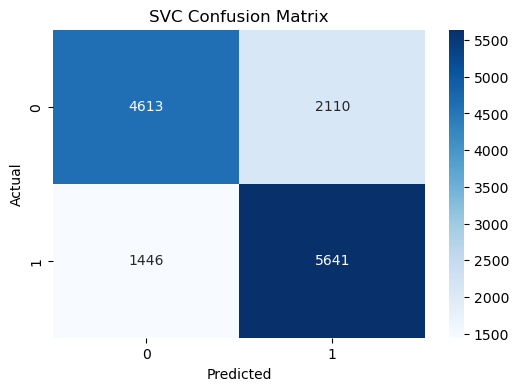

In [17]:
total_metrics = {}

for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")

    if name in RAW_MODELS:
        X_tr, X_te = X_train, X_test
    else:
        X_tr, X_te = X_train_scaled, X_test_scaled

    model.train(X_tr, y_train)
    preds = model.predict(X_te)
    total_metrics[name] = helpers.evaluate.evaluate_model(y_test, preds, name)


Report Stats

In [18]:
# Get best metrics
bestModel = ""
bestPerformance = 0.0
for name, metrics in total_metrics.items():
    if metrics["Accuracy"] > bestPerformance:
        bestModel = name
        bestPerformance = metrics["Accuracy"]

print("Best Model =", bestModel)
print("Model Accuracy =", bestPerformance)


Best Model = Neural Network
Model Accuracy = 0.7462708182476466


Hyperparameter Tuning

In [ ]:
#ignoring warnings when tuning hyperparams
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
for name, model in models.items():
    print(f"\n--- Tuning Hyperparameters for {name} ---")
    model.reset(name)
    model.tune_params(X_train_scaled, y_train, 10, name)


--- Tuning Hyperparameters for Decision Tree ---


[I 2025-04-23 23:00:59,084] A new study created in RDB with name: Decision Tree
[I 2025-04-23 23:01:00,483] Trial 0 finished with value: 0.6860380244845489 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 35, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.6860380244845489.
[I 2025-04-23 23:01:00,942] Trial 1 finished with value: 0.7056810486587259 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7056810486587259.
[I 2025-04-23 23:01:01,454] Trial 2 finished with value: 0.715765088565367 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.715765088565367.
[I 2025-04-23 23:01:01,870] Trial 3 finished with value: 0.7139185169390453 and parameters: {'criter


--- Tuning Hyperparameters for Logistic Regression ---


[I 2025-04-23 23:01:05,605] A new study created in RDB with name: Logistic Regression
[I 2025-04-23 23:01:05,806] Trial 0 pruned. 
[I 2025-04-23 23:01:05,989] Trial 1 pruned. 
[I 2025-04-23 23:01:06,168] Trial 2 pruned. 
[I 2025-04-23 23:01:06,344] Trial 3 pruned. 
[I 2025-04-23 23:01:06,525] Trial 4 pruned. 
[I 2025-04-23 23:01:06,708] Trial 5 pruned. 
[I 2025-04-23 23:01:06,883] Trial 6 pruned. 
[I 2025-04-23 23:01:07,064] Trial 7 pruned. 
[I 2025-04-23 23:01:07,240] Trial 8 pruned. 
[I 2025-04-23 23:01:07,419] Trial 9 pruned. 



--- Tuning Hyperparameters for K Nearest Neighbors ---


[I 2025-04-23 23:01:07,649] A new study created in RDB with name: K Nearest Neighbors


In [ ]:
#final training
for name, model in models.items():
    print(f"\n--- Final Training for {name} ---")
    model.train(X_train_scaled, y_train)